In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [50]:
train_df = pd.read_csv('train.csv', index_col="PassengerId")
test_df = pd.read_csv('train.csv', index_col="PassengerId")

In [38]:
print(train_df.iloc[0, 2])
train_df.head()

Braund, Mr. Owen Harris


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# missing values
miss_dict = {}
for col in train_df.columns:
    miss_dict[col] = train_df[col].isna().sum()

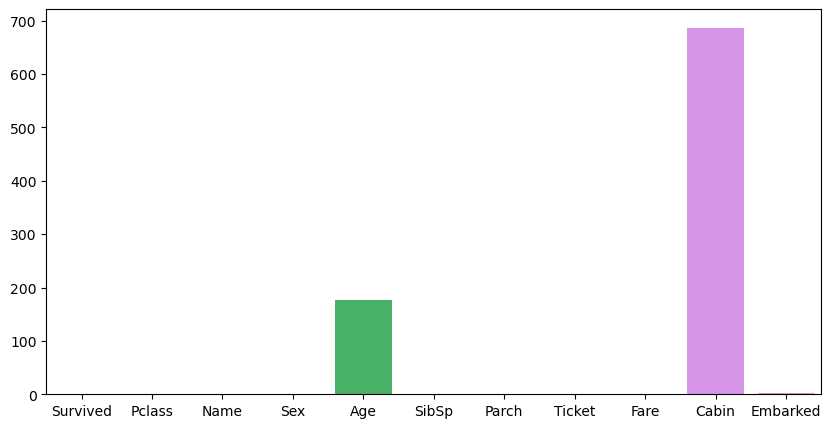

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=list(miss_dict.keys()), y=list(miss_dict.values()));

In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [56]:
for c in ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    train_df[c] = train_df[c].astype('category')
    test_df[c] = test_df[c].astype('category')

In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [58]:
train_df['Sex'].value_counts().to_frame()

,Sex
male,577
female,314


In [59]:
train_df['Survived'].value_counts().to_frame()

,Survived
0,549
1,342


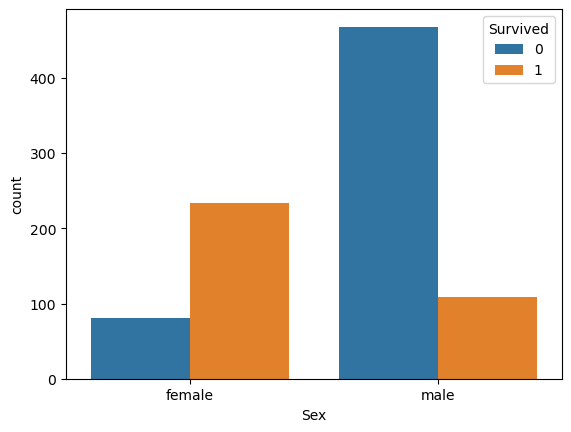

In [63]:
sns.countplot(data=train_df, x="Sex", hue="Survived");

In [64]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [83]:
cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

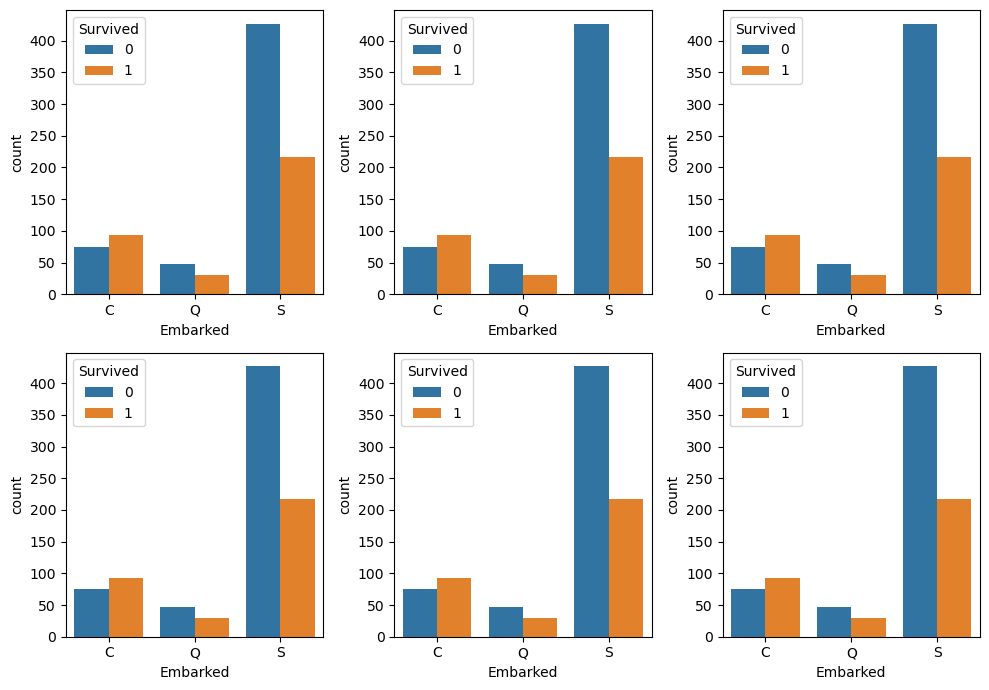

In [92]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(10, 7))

for r in range(2):
    for c in range(3):
        sns.countplot(data=train_df, x=col, hue='Survived', ax=ax[r, c])
    
plt.tight_layout()

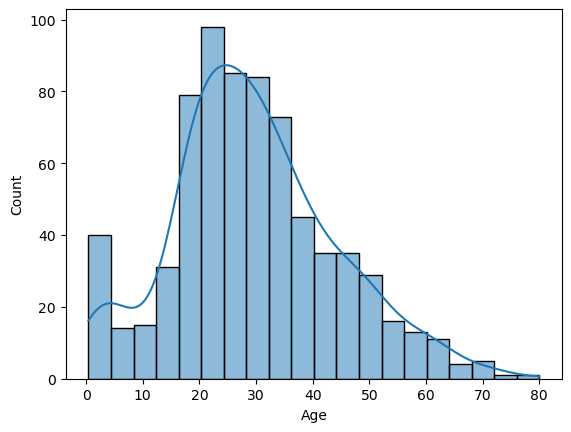

In [103]:
fig, ax = plt.subplots()

sns.histplot(train_df, x="Age", ax=ax, kde=True);

In [104]:
train_df['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

In [107]:
train_df['Fare'] = pd.qcut(train_df['Fare'], 4)

In [108]:
train_df['Fare']

PassengerId
1       (-0.001, 7.91]
2      (31.0, 512.329]
3       (7.91, 14.454]
4      (31.0, 512.329]
5       (7.91, 14.454]
            ...       
887     (7.91, 14.454]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (14.454, 31.0]
891     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [109]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    category
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(7), float64(1), object(3)
memory usage: 42.3+ KB


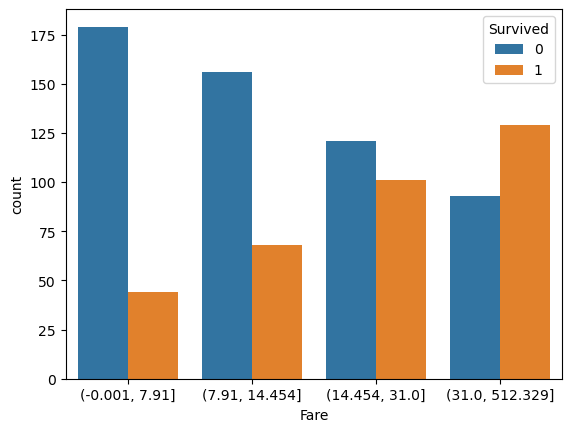

In [116]:
# barplot -> moi x -> co 1 y
# countplot
# trong nay, do moi x, co rat nhieu gia tri y
sns.countplot(data=train_df, hue="Survived", x="Fare", );